# Introduction into Unsupervised Machine Learning: dimensionality reduction and clustering techniques

In [26]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import random
import csv
random.seed(555)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

autotexts = datasets.fetch_20newsgroups(categories=['rec.autos'], remove=('headers', 'footers', 'quotes'), subset='train')['data']
religiontexts = datasets.fetch_20newsgroups(categories=['soc.religion.christian'], remove=('headers', 'footers', 'quotes'), subset='train')['data']

texts = autotexts[:20] + religiontexts[:20]
random.shuffle(texts)

print the length of the texts

In [2]:
len(religiontexts), len(autotexts)

(599, 594)

if you want to know more about the specific dataset we are using here, you can run the following cell. 

In [40]:
datasets.fetch_20newsgroups?

In [64]:
# print textual data

In [63]:
print(f"Article 1: \n\n{religiontexts[0][:1000]}")
print(f'\n{"*" * 80}\n')
print(f"Article 2: \n\n{autotexts[0][:1000]}")

Article 1: 

I wrote in response to dlecoint@garnet.acns.fsu.edu (Darius_Lecointe):


Was Paul a God too? Is an interpretation of the words of Paul of higher
priority than the direct word of Jesus in Matt5:14-19? Paul begins
Romans 14 with "If someone is weak in the faith ..." Do you count
yourself as one who is weak in the faith?


Yes, but what does the Bible have to say? What did Jesus say? Paul
closes Romans 14 with, "On the other hand, the person with doubts about
something who eats it anyway is guilty, because he isn't acting on his
faith, and any failure to act on faith is a sin." Gaus, ISBN:0-933999-99-2
Have you read the Ten Commandments which are a portion of the Law? Have
you read Jesus' word in Matt5:14-19? Is there any doubt in your mind
about what is right and what is sin (Greek hamartia = missing the mark)?


Whereas, the Ten Commandments and Jesus' words in Matt5:14-19 are fairly
clear, are they not?


Matt5:14-19 doesn't answer your question?


Breaking bread - roughly

Next, inspect your data some more: what is in the data?
as you can see, this data is not preprocessed--you may want to apply some of the preprocessing steps from day 2 in order to clean up the data

In [65]:
texts[20]

'\nOn the cars mentioned - 3 series from the late 80\'s the "electronic"\nodometer is really a mechanical drum type odometer, that is driven\nby pulses from a speed sensor on the rear axle.  These pulses are \nconverted into mechanical pulses that turn the odometer - and speedometer.\nNo way changing or erasing an eprom is going to change the mileage\nreading.  It also means the odometer is just as easy (or hard) to\nchange as any other mechanical odometer.\n\nOn the other hand it is a bit easier to disconnect the speed sensor\nand run the car with no speedometer or odometer reading...a simple\nswitch will do the job.  It also will disable the speed limiter,\nwhich will enable the car to reach it\'s full speed.  ;-)\n\n'

In [6]:
texts[0]

'Heres the life of St. MAria Goretti, posted with kind permission of\nthe editor of the Australian Catholic Magazine "Morning Star".\n\nHope you like it.\n\n    Put up with anything to prevent sin St. Maria Goretti\n\n\n\n    Maria was born on October 16th 1890 to Luigi and Assunta Goretti,\n    the  eldest  daughter  in the family of seven. She was a cheerful\n    girl, always imitating her parents.  She had but one disire,  but\n    one wish: to receive our Lord in the Blessed Sacrament.\n\n    The date was finally set for little Maria to receive our Lord  on\n    the feast of Corpus Christi. For Maria, time seemed like an eter-\n    nity as she  slowly  neared  the  great  day.   When  it  finally\n    arrived, Fr. Jerome( the priest who was to celebrate the Mass and\n    give the children their First Holy Communion) delivered a  sermon\n    on\tthe  immense love of Jesus Christ for them and the great love\n    we should have in return for Him. He then warmly  urged  them  to\n    d

## Dimensionality reduction:  PCA

Now that we have inspected the data, let's proceed with running Principal Component Analysis (PCA).

*Step 1*

Create an instance of the `CountVectorizer()` class from `sklearn`, which we'll name `myvec`. This instance possesses specific properties for transforming text data into a document-term matrix, including a straightforward technique for dimensionality reduction: Pruning (specifically, removing tokens that occur in more than 50\% of the documents, `max_df=.5` and features that occur in less than 5 documents: `min_df=5`).

In [7]:
myvec = CountVectorizer(max_df=.5, min_df=5)

*Step 2* 

Create an instance of the Principal Component Analysis (PCA) class (imported from `sklearn`), named `mypca`. 
`n_components=2` means that you want to reduce the dimensionality of the data to two principal components. 

In [67]:
mypca = PCA(n_components=2)

*Step 3* 

Create a `sklearn` `pipeline` that sequentially applies a series of data transformations. The pipeline will consist of three steps: `myvec`, the `FunctionTransformer`, and `mypca`.
The FunctionTransformer applies a custom function to the data: it converting a sparse matrix to a dense array (as `mypca` expects this). 

*Step 4*

`mypipe.fit_transform(texts)`: here we fit the `mypipe` pipeline to your input texts. It applies each transformation step sequentially: first, it vectorizes the text data, then converts the sparse matrix to a dense array, and finally reduces the dimensionality to two components using PCA. `r` is a reduced-dimensional representation of the text data.


In [9]:
mypipe = make_pipeline(myvec, FunctionTransformer(lambda x: np.asarray(x.todense()), accept_sparse=True), mypca)
r = mypipe.fit_transform(texts)

inspect the shape of the `r` object

In [10]:
r.shape

(40, 2)

In [11]:
r[0]

array([ 20.88856326, -11.88221923])

These list comprehensions extract the first and second components of each data point in the variable r. Hence, the x and y coordinates for each point in the scatter plot are extracted and plotted. 

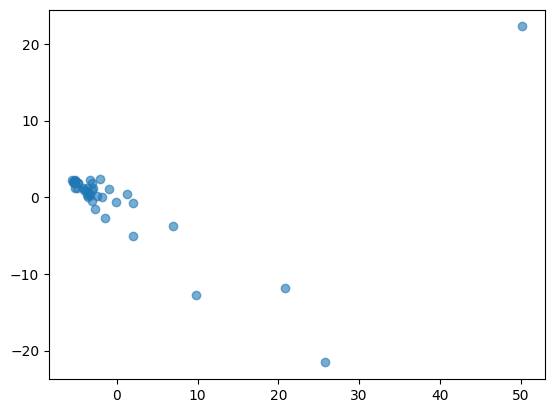

In [12]:
plt.scatter([e[0] for e in r], [e[1] for e in r], alpha=.6)

Assign components scores to documents

In [13]:
for i, case in enumerate(r):
    print(texts[i][:40].replace("\n", " "), case[0], case[1])

Heres the life of St. MAria Goretti, pos 20.88856326118096 -11.882219232741553
 A question for you - can you give me th 6.910990952938773 -3.6839201820679777
 If you don't already know it, you shoul -5.190653765732617 1.229487805947572
  I think you are vastly oversimplifying -0.0770574871081561 -0.5813748483996394
My brother has been alienated from my pa 9.798003410585313 -12.688910556109976
Is there anyone out there in NetLand tha -4.804292519202744 1.8794786968664239
A "new Christian" wrote that he was new  1.9591114277945885 -0.7582900021479807
Hello,   I have a 92 Toyota 4X4 and in t -3.347735405811322 0.3536708248550773
                            ^^^^^^^^^^^^ -2.089946478051476 2.4285794650817243
 	As a stong self-defense advocate, you' -3.645447207800208 0.2558613343150798
True.  Also read 2 Peter 3:16  Peter war -5.2771696498316 2.0616111995448736
 An interesting interpretation of Revela -2.413623971396888 0.22683960197842917
     This is the problem. This is not he -3.0883288

Write the textual data to a `.csv` file

In [14]:
i = 0
with open("output.csv", mode="w") as f:
    writer = csv.writer(f)
    for case in r:
        writer.writerow([texts[i], case[0], case[1]])
        i+=1

or, using pandas to convert to a `df`

In [69]:
import pandas as pd

df = pd.DataFrame(zip(texts, [e[0] for e in r], [e[1] for e in r]), columns=['texts', 'comp_1', 'comp_2']) 
df.head()

,texts,comp_1,comp_2
0,From article <1993Apr5.200048.23421@ucsu.Color...,1.367383,0.510390
1,\nPerhaps it is because witnesses who have lef...,5.335943,0.016034
2,"\nIf you don't already know it, you should cal...",4.088168,3.816745
3,"Well, there *is* a difference.\n\nI don't happ...",7.705803,5.579548
4,"Is clear coat really worth it? Yes, on the sh...",6.922052,3.420928


if you want to display more texts, you may run:  
`df.style.set_properties(subset=['texts'], **{'width': '100px'})`

Read the `output.csv` file back into memory 

In [70]:
import pandas as pd
df = pd.read_csv("output.csv", header = None)
df.head()

,0,1,2
0,"Heres the life of St. MAria Goretti, posted wi...",20.888563,-11.882219
1,\nA question for you - can you give me the nam...,6.910991,-3.683920
2,"\nIf you don't already know it, you should cal...",-5.190654,1.229488
3,\n\nI think you are vastly oversimplifying thi...,-0.077057,-0.581375
4,My brother has been alienated from my parents ...,9.798003,-12.688911


# dimensionality reduction: SVD

Try performing the same task as before, but this time using Singular Value Decomposition (SVD). One advantage of using SVD is that there's no need to convert our data into a dense structure.

make longer dataset

In [71]:
texts = autotexts + religiontexts
len(texts)

1193

We create an instance of the `TruncatedSVD` class with `n_components=2`,  indicating that we want to reduce the dimensionality of the data to two components using `SVD`. This is a technique similar to PCA but designed to work with sparse data.

Create an instance of `make_pipeline` from `sklearn` called  `mypipe`. This pipeline applies two steps sequentially: myvec, which vectorizes the text data using `CountVectorizer` (see in the code above), and `mysvd`, which reduces the dimensionality. 

`mypipe.fit_transform(texts)`: here we fit the `mypipe` pipeline to our texts. It applies each transformation step in order: first, it vectorizes the text data using CountVectorizer, and then it reduces the dimensionality to two components using `SVD`. The result are stored in `r`.

In [72]:
mysvd = TruncatedSVD(n_components=2)
mypipe = make_pipeline(myvec, mysvd)
r = mypipe.fit_transform(texts)

In [73]:
TruncatedSVD?

Similarly as we did for PCA, lets visualize the results... 

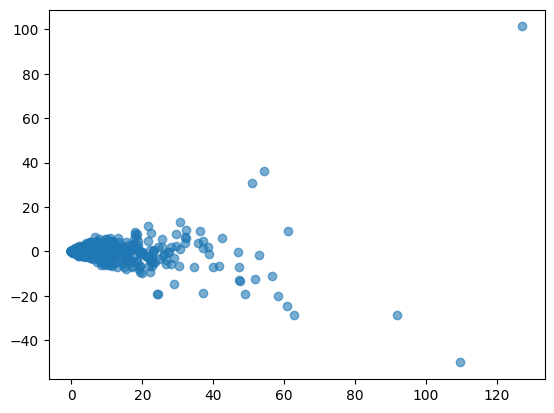

In [20]:
plt.scatter([e[0] for e in r], [e[1] for e in r], alpha=.6)

assign the coordinates and texts to a `df`, so we can inspect the results better. 

In [76]:
df = pd.DataFrame(r)
df.columns = ['x','y']
df['texts'] = texts
df.head(3)

,x,y,texts
0,1.367383,0.510485,From article <1993Apr5.200048.23421@ucsu.Color...
1,5.335943,0.015659,\nPerhaps it is because witnesses who have lef...
2,4.088168,3.816815,"\nIf you don't already know it, you should cal..."


if you want to inspect particular elements, you can do so as well. 

In [38]:
df.query("x>60 & y >20")

,x,y,texts
42,127.154194,101.298242,Archive-name: rec-autos/part5\n\n[this article...


# Cluster analysis: k-means

Next, we continue with clustering techniques, more specifically, k-means 


*Step 1*

Create an stance of the `TfidfVectorizer` called `vec`. Again, we apply pruning: `min_df=5`: Words that appear in fewer than 5 documents will be ignored. `max_df=0.4`: Words that appear in more than 40% of the documents will be ignored.
    
*Step 2*

We use the `vec` object to transform the text data into a document-term matrix in TF-IDF format. 

*Step 3*

Create an instance of the `K-Means` clustering algorithm with the following parameters:

`n_clusters=k`: Specifies that you want to create k clusters.
`init='k-means++'`: Initializes the cluster centroids using a smart method called "k-means++."
max_iter=100: Specifies the maximum number of iterations for each K-Means run.
n_init=1: Indicates that K-Means will be run only once (with the specified number of clusters).

u fit the K-Means model (km) to the transformed TF-IDF features (features) and obtain cluster assignments for each document. The predictions array contains the cluster labels for each document in your dataset.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

k = 5

vec = TfidfVectorizer(min_df=5, max_df=.4)
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)

Print out the resulting clusters

In [77]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names_out()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: church by me please anyone about from thanks was would 
Cluster 1: god we he his was who jesus what by do 
Cluster 2: car any dealer they cars price has me new anyone 
Cluster 3: they was at your about an get can out would 
Cluster 4: my was just there any out would what had right 


# Combining cluster analysis and dimensionality reduction

First, let's rewrite the code above to use a pipeline instead of separate steps. Note that this is equivalent to the code above.

In [23]:
k = 5
coolpipe = make_pipeline( TfidfVectorizer(min_df=5, max_df=.4), 
                         KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1))

mycoolpredictions = coolpipe.fit_predict(texts)

Now, lets add a SVD dimension reduction in between:

In [25]:
k = 5
evencoolerpipe = make_pipeline( TfidfVectorizer(min_df=5, max_df=.4), 
                               TruncatedSVD(n_components=10),
                               KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1))

mycoolestpredictions = evencoolerpipe.fit_predict(texts)

As you see, it's literally just adding the SVD in the middle of the pipe!